In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file = '/Users/hrobjarturh/Documents/DTU/digitalocean/CMEMS-data-handling/data/copernicus/cmems_mod_bal_bgc_my_P1D-m/cmems_mod_bal_bgc_my_P1D-m_o2b_9.85E-10.71E_55.57N-56.31N_2018-01-01-2018-12-31.nc'

In [3]:
ds = xr.open_dataset(file, engine='netcdf4')

In [4]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:    (time: 365, latitude: 45, longitude: 32)
Coordinates:
  * latitude   (latitude) float32 180B 55.57 55.59 55.61 ... 56.27 56.29 56.31
  * longitude  (longitude) float32 128B 9.847 9.875 9.903 ... 10.65 10.68 10.71
  * time       (time) datetime64[ns] 3kB 2018-01-01 2018-01-02 ... 2018-12-31
Data variables:
    o2b        (time, latitude, longitude) float32 2MB ...
Attributes:
    references:                https://marine.copernicus.eu/
    source:                    CMEMS BAL MFC NEMO model output converted to N...
    title:                     CMEMS ERGOM daily integrated model fields
    comment:                   Data on cropped native product grid. Horizonta...
    institution:               Baltic MFC, PU Danish Meteorological Institute
    Conventions:               CF-1.0
    contact:                   servicedesk.cmems@mercator-ocean.eu
    history:                   Fri Dec 16 10:51:30 2022: cdo -z zip_1 --sortn...
    copernicusmarine_version:  2.0.0

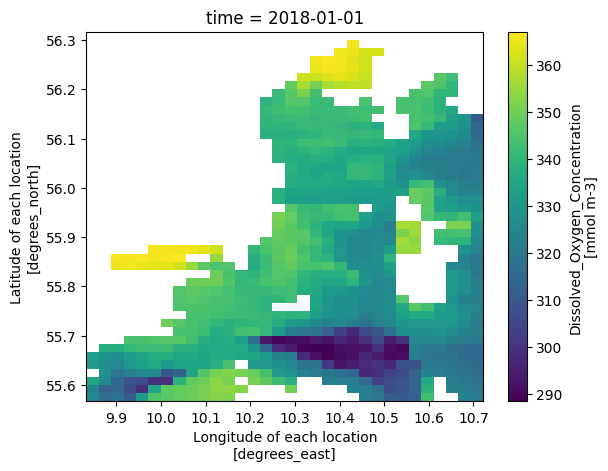

In [5]:
ds.isel(time=0)['o2b'].plot()



In [6]:
ds_position = ds.sel(longitude=10.34705, latitude=56.09158 , method='nearest')

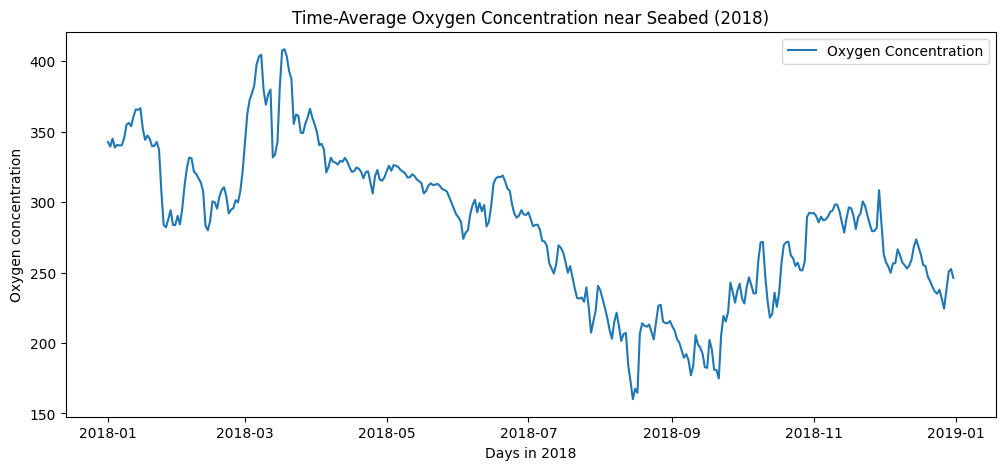

In [7]:
# Plot the time-average oxygen concentration
plt.figure(figsize=(12, 5))
plt.plot(ds_position['time'], ds_position['o2b'], label='Oxygen Concentration')
plt.title('Time-Average Oxygen Concentration near Seabed (2018)')
plt.xlabel('Days in 2018')
plt.ylabel('Oxygen concentration')
plt.legend()

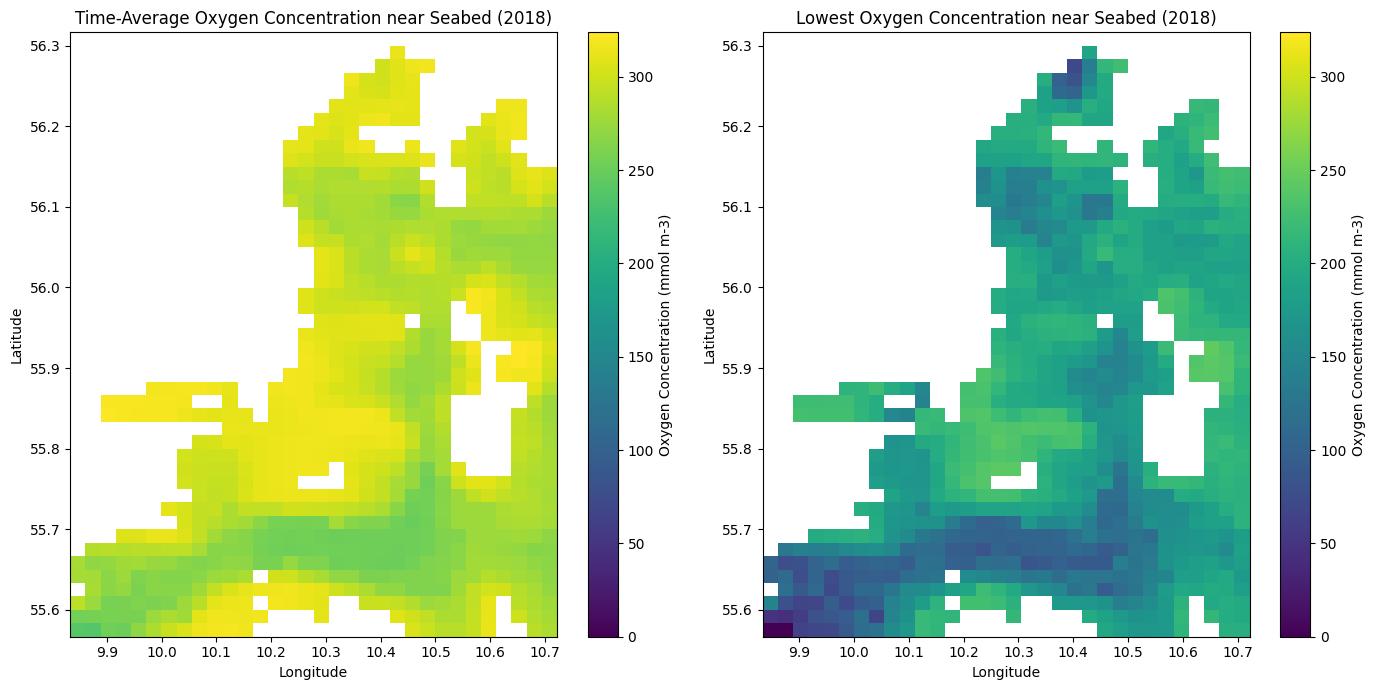

In [8]:
# existing code...
import numpy as np

# Calculate the time-average oxygen concentration near the seabed
time_avg_oxygen = ds['o2b'].mean(dim='time')

# Calculate the minimum oxygen concentration near the seabed over time
min_oxygen = ds['o2b'].min(dim='time')

# Determine the color limits based on the data
vmin = min(time_avg_oxygen.min(), min_oxygen.min())
vmax = max(time_avg_oxygen.max(), min_oxygen.max())

# Plot the time-average oxygen concentration
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pcolormesh(ds['longitude'], ds['latitude'], time_avg_oxygen, shading='auto', cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Oxygen Concentration (mmol m-3)')
plt.title('Time-Average Oxygen Concentration near Seabed (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot the minimum oxygen concentration
plt.subplot(1, 2, 2)
plt.pcolormesh(ds['longitude'], ds['latitude'], min_oxygen, shading='auto', cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Oxygen Concentration (mmol m-3)')
plt.title('Lowest Oxygen Concentration near Seabed (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()
# existing code...

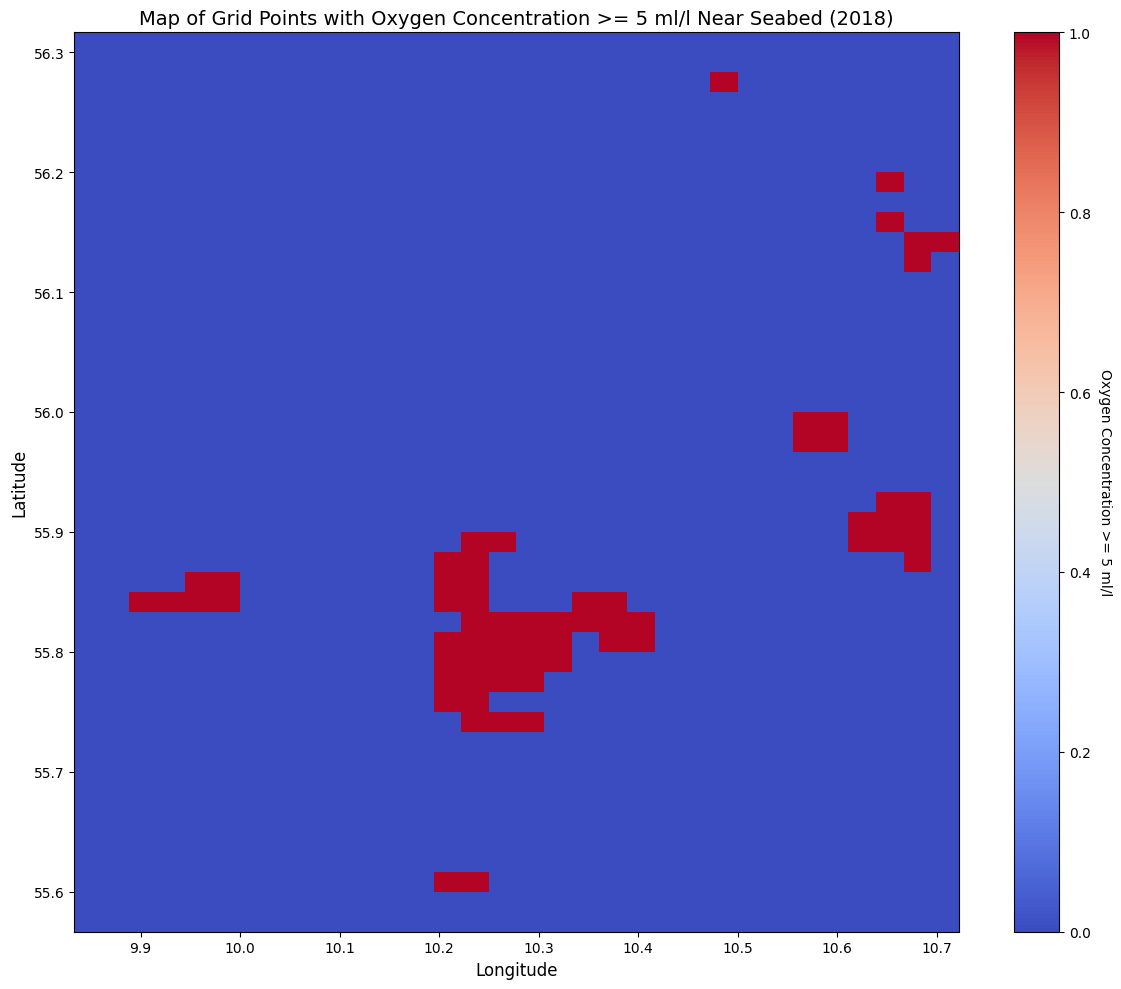

In [9]:
# existing code...
# Conversion factor from mmol/m³ to ml/l
conversion_factor = 0.022391

# Convert oxygen concentration to ml/l
oxygen_ml_per_l = ds['o2b'] * conversion_factor

# Find grid points where the minimum oxygen concentration is not below 5 ml/l
min_oxygen_ml_per_l = oxygen_ml_per_l.min(dim='time')
safe_oxygen_points = min_oxygen_ml_per_l >= 5

# Plot the grid points
plt.figure(figsize=(12, 10))
plt.pcolormesh(ds['longitude'], ds['latitude'], safe_oxygen_points, shading='auto', cmap='coolwarm')
cbar = plt.colorbar()
cbar.set_label('Oxygen Concentration >= 5 ml/l', rotation=270, labelpad=15)
plt.title('Map of Grid Points with Oxygen Concentration >= 5 ml/l Near Seabed (2018)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# existing code...